# Testbenches for the Transient Analysis

In [1]:
import sys
sys.path.append("..")

import logging
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

from Xyce import getXyceData
from yalrf import YalRF

[INFO]: YalRF.Analyses.Transient: Starting Transient analysis.
[INFO]: YalRF.Analyses.Transient: Finished Transient analysis.


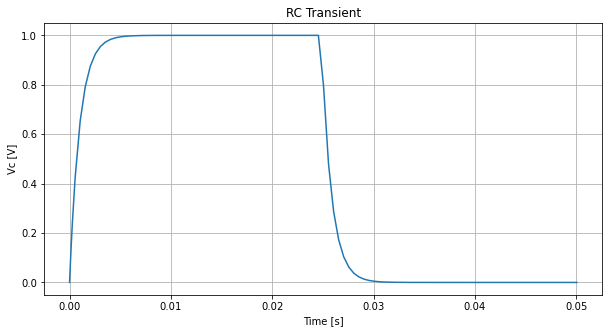

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import setup
from yalrf import YalRF

y = YalRF('RC Transient')

y.add_vstep('V1', 'n1', 'gnd', 1.0, tstart=0, tstop=25e-3)
y.add_resistor('R1', 'n1', 'n2', 1e3)
y.add_capacitor('C1', 'n2', 'gnd', 1e-6)

tr1 = y.add_tran_analysis('TR1', 0, 50e-3, 500e-6)
#tr1.options['max_iterations'] = 500
#tr1.options['reltol'] = 1e-6

y.run('TR1')

t = y.get_time('TR1')
vn2 = y.get_voltage('TR1', 'n2')

plt.figure(figsize=(10,5))
plt.plot(t, vn2)
plt.title('RC Transient')
plt.xlabel('Time [s]')
plt.ylabel('Vc [V]')
plt.grid()
plt.show()

[INFO]: YalRF.Analyses.Transient: Starting Transient analysis.
[INFO]: YalRF.Analyses.Transient: Finished Transient analysis.


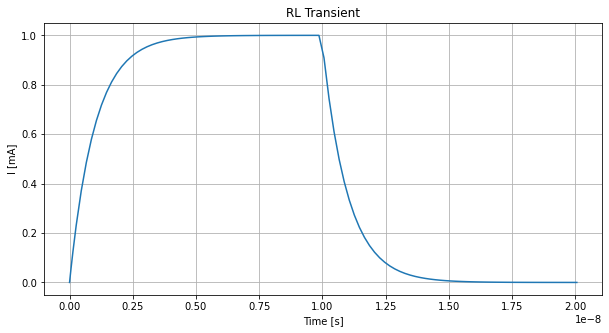

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import setup
from yalrf import YalRF

y = YalRF('RL Transient')

y.add_vstep('V1', 'n1', 'gnd', 1.0, tstart=0, tstop=10e-9)
y.add_resistor('R1', 'n1', 'n2', 1e3)
y.add_inductor('L1', 'n2', 'gnd', 1e-6)

tr1 = y.add_tran_analysis('TR1', 0, 20e-9, 200e-12)
#tr1.options['max_iterations'] = 500
#tr1.options['reltol'] = 1e-6

sol = y.run('TR1')

t = y.get_time('TR1')
i = -sol[:,2]

plt.figure(figsize=(10,5))
plt.plot(t, i * 1e3)
plt.title('RL Transient')
plt.xlabel('Time [s]')
plt.ylabel('I [mA]')
plt.grid()
plt.show()


[INFO]: YalRF.Analyses.Transient: Starting Transient analysis.
[INFO]: YalRF.Analyses.Transient: Finished Transient analysis.


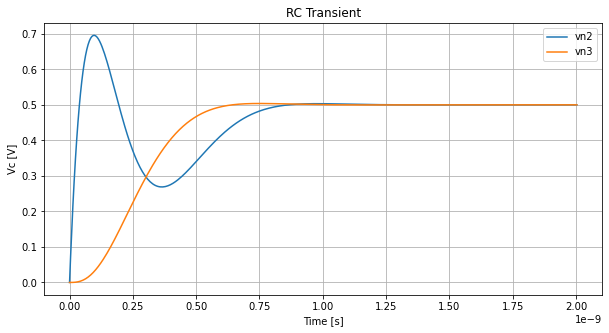

In [5]:
import numpy as np
import matplotlib.pyplot as plt

import setup
from yalrf import YalRF

y = YalRF('RC Transient')

y.add_vstep('V1', 'n1', 'gnd', 1.0, tstart=0, tstop=1e-3)
y.add_resistor('R1', 'n1', 'n2', 50)
y.add_capacitor('C1', 'n2', 'gnd', 1.074e-12)
y.add_inductor('L1', 'n2', 'n3', 7.723e-9)
y.add_capacitor('C2', 'n3', 'gnd', 7.014e-12)
y.add_resistor('R2', 'n3', 'gnd', 50)

tr1 = y.add_tran_analysis('TR1', 0, 2e-9, 5e-12)
#tr1.options['max_iterations'] = 500
#tr1.options['reltol'] = 1e-6

y.run('TR1')

t = y.get_time('TR1')
vn2 = y.get_voltage('TR1', 'n2')
vn3 = y.get_voltage('TR1', 'n3')

plt.figure(figsize=(10,5))
plt.plot(t, vn2)
plt.plot(t, vn3)
plt.title('RC Transient')
plt.xlabel('Time [s]')
plt.ylabel('Vc [V]')
plt.legend(['vn2', 'vn3'])
plt.grid()
plt.show()
